# Author : B Sireesha

## Data Science & Business Analytics Intern

Task 2 : Prediction using UnSupervised Machine Learning

GRIP - The Sparks Foundation

In this task,the  main goal is to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset. 

In [19]:
# Importing the required libraries.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Loading And Inspecting Data

In [2]:
iris = load_iris()

print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# Printing target name

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
x = iris['data']
y = iris['target']

# Determining optimum number of clusters using Elbow method

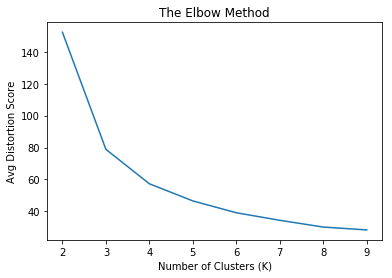

In [8]:
inertia = []
ax = []
for i in range(2,10):
    ax.append(i)
    kmeans= KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
plt.plot(ax,inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Avg Distortion Score')
plt.show()

# K-means clusturing

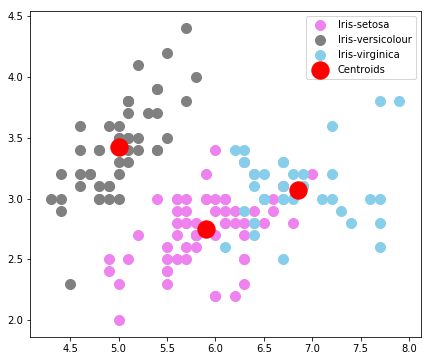

In [18]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=0)
kmeans.fit(x)
y_pred = kmeans.predict(x)

# Visualising the clusters - On the first two columns

plt.figure(figsize=(7,6))

plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'violet', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'grey', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'skyblue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'red', label = 'Centroids')

plt.legend()

# Principal Component Analysis

In [20]:
pca = PCA(n_components=2)
xp = pca.fit_transform(x)

# Plotting - to reorient the data from the original axes to the ones represented by the principal components¶

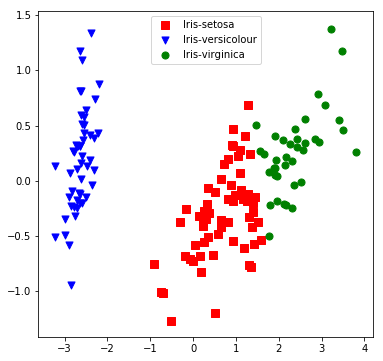

In [25]:
plt.figure(figsize=(6,6))

plt.scatter(xp[y_pred == 0, 0], xp[y_pred == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa',marker='s')
plt.scatter(xp[y_pred == 1, 0], xp[y_pred == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour',marker='v')
plt.scatter(xp[y_pred == 2, 0], xp[y_pred == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica',marker='o')
plt.legend( loc='upper center')